In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [12]:
df: pd.DataFrame = pd.read_csv("data.csv", sep=";", names=[i for i in range(10)])
print(df)

        0      1      2      3       4      5      6      7      8      9
0  -4.772 -3.551 -3.498 -3.552  -6.023 -4.315 -2.888 -6.262 -5.569 -5.164
1  -3.396 -0.389 -3.421 -2.493  -4.189 -4.537 -4.557 -4.185 -3.445 -8.546
2  -4.056 -5.355 -1.346  0.635  -4.934 -4.044 -3.669  0.817 -0.636 -2.788
3  -3.200 -2.915 -0.990 -7.943  -5.401 -9.015 -2.823 -0.789 -6.192 -2.745
4  -2.574 -6.034 -5.185 -6.383  -5.883 -3.322 -2.779 -2.376 -7.034 -3.848
5  -4.941 -4.125 -4.109 -3.298  -1.612 -5.391 -0.622 -4.092 -6.054 -4.279
6  -2.812 -7.251 -5.361 -5.462  -3.884 -6.113 -2.173 -2.791 -7.564 -4.829
7  -2.371 -2.310 -0.359 -3.546  -2.657 -4.063 -2.876 -4.228 -0.998 -8.238
8  -2.917 -0.890 -1.665 -4.112  -4.852 -0.121 -3.169 -6.575 -3.896 -3.986
9  -2.453 -5.961 -1.383 -5.573  -3.164 -3.797 -3.142 -1.534 -2.408 -1.947
10 -0.415 -4.667 -4.274 -5.442 -10.269 -6.069 -6.395 -2.339 -2.839 -3.404
11 -4.162 -3.475 -6.423 -1.630   0.896 -4.690 -5.902 -5.283 -5.304 -2.866


In [13]:
#6 вариант N(a, sigma)
alpha = 0.02

In [14]:
array = np.sort(df.to_numpy().reshape(df.shape[0]*df.shape[1]))
n = len(array)
print(array, array.shape, sep="\n")

[-10.269  -9.015  -8.546  -8.238  -7.943  -7.564  -7.251  -7.034  -6.575
  -6.423  -6.395  -6.383  -6.262  -6.192  -6.113  -6.069  -6.054  -6.034
  -6.023  -5.961  -5.902  -5.883  -5.573  -5.569  -5.462  -5.442  -5.401
  -5.391  -5.361  -5.355  -5.304  -5.283  -5.185  -5.164  -4.941  -4.934
  -4.852  -4.829  -4.772  -4.69   -4.667  -4.557  -4.537  -4.315  -4.279
  -4.274  -4.228  -4.189  -4.185  -4.162  -4.125  -4.112  -4.109  -4.092
  -4.063  -4.056  -4.044  -3.986  -3.896  -3.884  -3.848  -3.797  -3.669
  -3.552  -3.551  -3.546  -3.498  -3.475  -3.445  -3.421  -3.404  -3.396
  -3.322  -3.298  -3.2    -3.169  -3.164  -3.142  -2.917  -2.915  -2.888
  -2.876  -2.866  -2.839  -2.823  -2.812  -2.791  -2.788  -2.779  -2.745
  -2.657  -2.574  -2.493  -2.453  -2.408  -2.376  -2.371  -2.339  -2.31
  -2.173  -1.947  -1.665  -1.63   -1.612  -1.534  -1.383  -1.346  -0.998
  -0.99   -0.89   -0.789  -0.636  -0.622  -0.415  -0.389  -0.359  -0.121
   0.635   0.817   0.896]
(120,)


In [15]:
intervals_count = int(np.log2(array.shape[0])) + 1
print(intervals_count)

7


-10.269 0.896
[-10.269  -8.674  -7.079  -5.484  -3.889  -2.294  -0.699   0.896]
[ 2.  5. 17. 35. 40. 12.  9.]


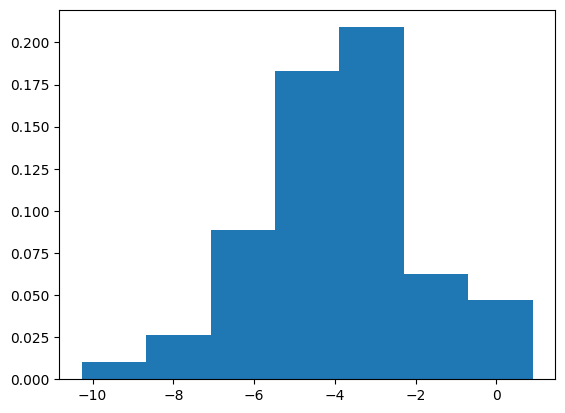

In [16]:
minv = min(array)
maxv = max(array)
print(minv, maxv)

#  n - количество значений в интервале, bars - местоположение столбов
m, bars, patches = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=False)

# #  берём среднее от координат левой и правой границ столбца
# x = [(bars[i] + bars[i+1])/2 for i in range(len(bars)-1)]
# print(x, m)
# 
# #  для более похожей интерполяции добавим на границах нулевые элементы 
# x.append(10)
# n_new = np.append(m, 0)
print(bars)
print(m)
plt.close()
freq, bars, patches = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=True)

In [17]:
mx = np.mean(array)
mu2 = np.mean(array**2)

a = mx
sigma = (mu2 - mx**2)**(1/2)

In [18]:
norm_dist = stats.norm(a, sigma)
print("a:", a, "sigma:", sigma)
print("n:", n)
p_t = []
for i in range(1, intervals_count + 1):
    if i == 1:
        p_t.append(norm_dist.cdf(bars[i]) * n)
        print(i, norm_dist.cdf(bars[i]))
    elif i == intervals_count:
        p_t.append((1 - norm_dist.cdf(bars[i-1]))*n)
        print(i, 1 - norm_dist.cdf(bars[i-1]))
    else:
        p_t.append((norm_dist.cdf(bars[i]) - norm_dist.cdf(bars[i-1]))*n)
        print(i, norm_dist.cdf(bars[i]) - norm_dist.cdf(bars[i-1]))
print("n*p:", p_t)

a: -3.870541666666667 sigma: 2.0742204555600847
n: 120
1 0.010284877382607421
2 0.05066771526262619
3 0.15737244272565748
4 0.2781248538476165
5 0.27994214315279625
6 0.16047924684872816
7 0.063128720779968
n*p: [np.float64(1.2341852859128906), np.float64(6.080125831515143), np.float64(18.884693127078897), np.float64(33.37498246171398), np.float64(33.59305717833555), np.float64(19.25750962184738), np.float64(7.575446493596161)]


In [19]:
p_t_new = np.array([p_t[0], p_t[1], p_t[2], p_t[3], p_t[4], p_t[5], p_t[6]])
m_new = np.array([m[0], m[1], m[2], m[3], m[4], m[5], m[6]])
# p_t_new = p_t
# freq_new = freq
X_s = np.sum((m_new - p_t_new)**2 / p_t_new)
print(p_t_new, m_new)

[ 1.23418529  6.08012583 18.88469313 33.37498246 33.59305718 19.25750962
  7.57544649] [ 2.  5. 17. 35. 40. 12.  9.]


In [20]:
X_2_alpha = stats.chi2.ppf(1 - alpha, len(m_new) - 1 - 2) # 5 - 1 - 2=2 
print("X_s:", X_s, "X_s_alpha:", X_2_alpha)
if X_s < X_2_alpha:
    print("H0 принимается: выборка распределена по нормальному закону")
else:
    print("H0 отклоняется: выборка распределена по другому закону р.")

X_s: 5.159230621297043 X_s_alpha: 11.667843403834778
H0 принимается: выборка распределена по нормальному закону


In [21]:
norm = stats.norm(0, 1)
ppf = norm.ppf(0.95)
print(ppf)

1.6448536269514722


In [22]:
print(ppf/5 + 100)

100.32897072539029
